In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data cleaning and preprocessing

In [2]:
# Loading the training data
traindf = pd.read_csv("adult/adult.data", index_col=False, names=['age','workclass','fnlwgt',
                                                                'education','education-num',
                                                                'marital-status','occupation',
                                                                'relationship','race','sex',
                                                                'capital-gain','capital-loss',
                                                                'hours-per-week','native-country','income'])

traindf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Loading test data
testdf = pd.read_csv("adult/adult.test", header=0, index_col=False, names=['age','workclass','fnlwgt',
                                                                        'education','education-num',
                                                                        'marital-status','occupation',
                                                                        'relationship','race','sex',
                                                                        'capital-gain','capital-loss',
                                                                        'hours-per-week','native-country','income'])

testdf.replace(" <=50K."," <=50K",inplace=True)
testdf.replace(" >50K."," >50K",inplace=True)
testdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Concatenate the two datasets

In [4]:
df=pd.concat([traindf,testdf])
df.shape

(48842, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


fnlwgt (final weight) is discrete and thus it is not useful. And since education number is there education is not needed either.

In [6]:
df=df.drop(['education', 'fnlwgt'], axis = 1)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Remove duplicates

In [7]:
df=df.drop_duplicates()
df.shape

(42468, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42468 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             42468 non-null  int64 
 1   workclass       42468 non-null  object
 2   education-num   42468 non-null  int64 
 3   marital-status  42468 non-null  object
 4   occupation      42468 non-null  object
 5   relationship    42468 non-null  object
 6   race            42468 non-null  object
 7   sex             42468 non-null  object
 8   capital-gain    42468 non-null  int64 
 9   capital-loss    42468 non-null  int64 
 10  hours-per-week  42468 non-null  int64 
 11  native-country  42468 non-null  object
 12  income          42468 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


Even though it shows there are no null values, some are available in the form of '?'. Replace them with NaN

In [9]:
df.replace(" ?",np.NaN,inplace=True)
df.head(20)
# Line 14 changed

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Replace NaN values using ffill

In [10]:
df.ffill(inplace = True)
df.head(20)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# convert the string data into labels
df['workclass'] = le.fit_transform(df['workclass'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [12]:
# sns.pairplot(df, hue = 'income', corner=True)

<Axes: >

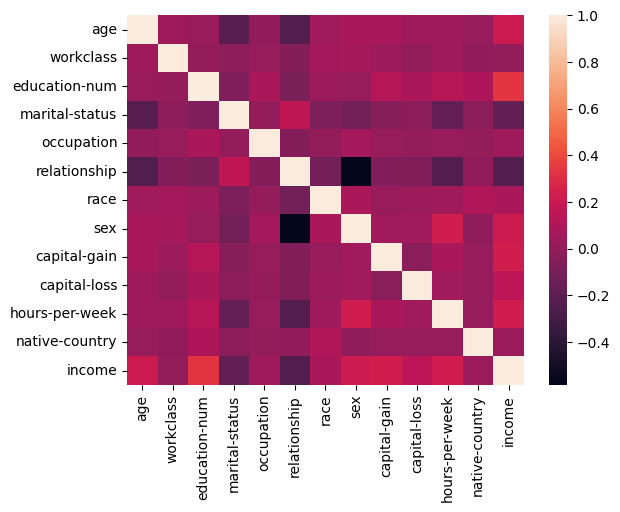

In [13]:
sns.heatmap(df.corr())

In [14]:
# splitting x and y
x=df.drop(['income'], axis = 1)
y=df['income']

split train test datasets

In [15]:
from sklearn.model_selection import train_test_split

# (2/3 train, 3/1 test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=9)



### Naive Bayes Model

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Check Metrics

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     10555
           1       0.68      0.34      0.45      3460

    accuracy                           0.80     14015
   macro avg       0.75      0.64      0.67     14015
weighted avg       0.78      0.80      0.77     14015



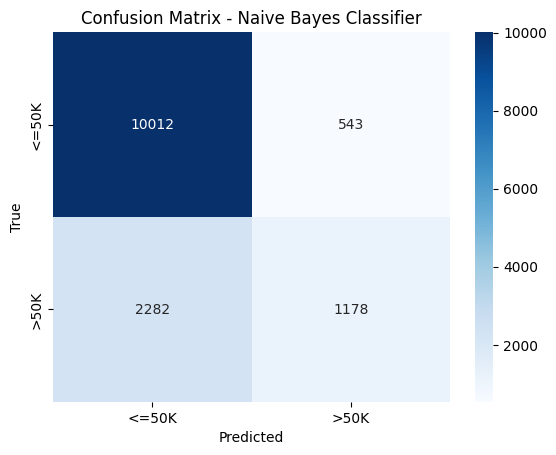

accuracy: 79.84302533000357


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_gnb = gnb.predict(x_test)
print(classification_report(y_test,y_pred_gnb))
# print(confusion_matrix(y_test,y_pred_gnb))

# Plotting the Confusion Matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_gnb), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

print(f'accuracy: {accuracy_score(y_test,y_pred_gnb)*100}')

### Random Forest Model

Model Tuning

In [18]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=9)

kfold = KFold(n_splits=5)
grid_cv = GridSearchCV(estimator=rf, 
                        param_grid={"n_estimators"  : [25,50,100,150,200] ,
                                    "max_features"  : [1,2,3,4,5],
                                    "min_samples_leaf":[1,2,4,6]}, 
                        scoring='accuracy',
                        cv=kfold)
gres=grid_cv.fit(x_train, y_train)

print(f"Best    : {gres.best_score_}")
print(f"Params  : {gres.best_params_}")

Best    : 0.8613505553584282
Params  : {'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 150}


In [19]:
tuned_rf=gres.best_estimator_
tuned_rf.fit(x_train,y_train)

RandomForestClassifier(max_features=3, min_samples_leaf=4, n_estimators=150,
                       random_state=9)

Check Metrics

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10555
           1       0.76      0.61      0.68      3460

    accuracy                           0.86     14015
   macro avg       0.82      0.77      0.79     14015
weighted avg       0.85      0.86      0.85     14015



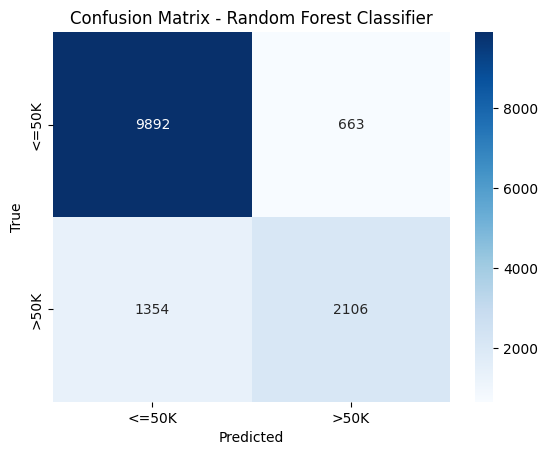

accuracy: 85.60827684623618


In [20]:
y_pred_rf = tuned_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))
# print(confusion_matrix(y_test,y_pred_rf))

# Plotting the Confusion Matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

print(f'accuracy: {accuracy_score(y_test,y_pred_rf)*100}')